In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings

In [2]:
Assetdata = pd.read_csv("Euro EUR (17 October 2022).csv").drop(labels=0, axis=0)
Assetdata.index = Assetdata["Date"]
Assetdata = Assetdata.drop("Date", axis =1 ).dropna()

#col_list = list(Assetdata)
#col_list[0], col_list[5] = col_list[5], col_list[0]
#Assetdata.columns = col_list

In [3]:
Assetdata.iloc[ : ,8 : 11 ] = Assetdata.iloc[ : ,8 : 11 ]/100

In [4]:
Assetdata.iloc[ : ,8 : 11 ] = 1/(1 + Assetdata.iloc[ : ,8 : 11 ])

In [5]:
# Assetdata.iloc[ : ,8 : 11 ] = Assetdata.iloc[ : ,8 : 11 ] / 252

In [6]:
Assetdata["number"] = range(5728)

In [7]:
Assetdata = Assetdata.sort_values(by=['number'], ascending=False)

Assetdata = Assetdata.drop("number", axis =1 ).dropna()

# Find the Tangency Portfolio of the 10 Assets

In [8]:
Assetdata

,EUR,GOLD,MXEA,MXEF,SPX,CTA,WTI OIL,Yen JPY,USD2Y,USD10Y,USD30Y
Date,,,,,,,,,,,
1/11/2000,0.8612,270.25,1489.43,357.85,1457.60,948.884,25.55,108.17,0.944020,0.945787,0.945555
2/11/2000,0.8584,270.65,1500.60,363.26,1438.56,942.906,24.91,108.22,0.943788,0.945618,0.945287
3/11/2000,0.8666,266.75,1524.18,367.46,1432.25,937.805,24.78,107.08,0.944162,0.945698,0.945358
6/11/2000,0.8625,265.15,1526.21,369.45,1449.68,937.167,24.22,107.44,0.944537,0.945734,0.945314
7/11/2000,0.8600,264.55,1535.11,370.15,1465.15,925.724,24.67,107.07,0.944688,0.944938,0.944653
...,...,...,...,...,...,...,...,...,...,...,...
10/10/2022,0.9702,1668.61,1693.58,897.74,3639.66,3070.843,91.13,145.72,0.958672,0.962621,0.962983
11/10/2022,0.9708,1666.34,1672.13,884.81,3612.39,3109.501,89.35,145.86,0.958699,0.962010,0.962242
12/10/2022,0.9703,1673.19,1657.83,864.66,3588.84,3128.704,87.27,146.91,0.958846,0.962492,0.962686


In [9]:
Assetdata["GOLD"].pct_change().dropna().cumsum()-1

Date
2/11/2000    -0.998520
3/11/2000    -1.012930
6/11/2000    -1.018928
7/11/2000    -1.021191
8/11/2000    -1.021380
                ...   
10/10/2022    1.144467
11/10/2022    1.143107
12/10/2022    1.147217
13/10/2022    1.143141
14/10/2022    1.129999
Name: GOLD, Length: 5727, dtype: float64

In [10]:
# calculate returns of the assets
AssetReturn = Assetdata.drop("CTA", axis = 1).pct_change().dropna()
AssetReturn = AssetReturn 
pd.set_option('display.max_rows', 200)
AssetReturn.head(200)

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,USD2Y,USD10Y,USD30Y
Date,,,,,,,,,,
2/11/2000,-0.003251,0.001480,0.007500,0.015118,-0.013063,-0.025049,0.000462,-0.000245,-0.000180,-0.000284
3/11/2000,0.009553,-0.014410,0.015714,0.011562,-0.004386,-0.005219,-0.010534,0.000397,0.000085,0.000076
6/11/2000,-0.004731,-0.005998,0.001332,0.005416,0.012170,-0.022599,0.003362,0.000397,0.000038,-0.000047
7/11/2000,-0.002899,-0.002263,0.005831,0.001895,0.010671,0.018580,-0.003444,0.000161,-0.000841,-0.000699
8/11/2000,-0.005233,-0.000189,0.002580,0.006025,-0.006832,0.044589,0.001681,-0.000727,-0.000265,-0.000246
9/11/2000,0.012975,0.002457,-0.001273,-0.004619,0.000522,0.019790,0.001772,-0.000321,-0.000104,-0.000085
10/11/2000,-0.008078,-0.001320,-0.006102,-0.009578,-0.007095,0.015601,0.004002,-0.000075,0.000104,0.000198
13/11/2000,-0.002908,-0.000189,-0.008536,-0.005257,-0.002912,0.049831,-0.001669,0.000160,0.000283,0.000057
14/11/2000,0.000583,0.001511,-0.008398,-0.030752,-0.027634,0.029622,0.004457,0.000076,0.000397,-0.000019


In [11]:
# calculate mean and standard deviation of returns
meanReturns = AssetReturn.mean()
stdDev = AssetReturn.std()
tableIndex = AssetReturn.columns.to_list()
MeanStdTable = pd.DataFrame(data = meanReturns, index = tableIndex, columns=['Mean'])
MeanStdTable["Standard Deviation"] = stdDev
MeanStdTable

,Mean,Standard Deviation
EUR,0.000038,0.005851
GOLD,0.000372,0.010628
MXEA,0.000078,0.010932
MXEF,0.000221,0.011703
SPX,0.000239,0.012470
WTI OIL,-0.000088,0.051214
Yen JPY,0.000074,0.006024
USD2Y,0.000003,0.000503
USD10Y,0.000003,0.000563
USD30Y,0.000003,0.000516


In [12]:
# calculate the covariance matrix of the eight assets
covMatrix = AssetReturn.cov()
covMatrix

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,USD2Y,USD10Y,USD30Y
EUR,3.423798e-05,3.436832e-06,-1.767922e-07,2.115444e-06,-6.857018e-07,-2.426187e-06,-1.071736e-05,2.352377e-07,3.714405e-08,-9.499313e-08
GOLD,3.436832e-06,1.129485e-04,-1.869669e-07,2.012784e-06,-5.593514e-08,-1.033268e-05,-2.802855e-06,7.223748e-08,6.912242e-08,1.128374e-08
MXEA,-1.767922e-07,-1.869669e-07,1.195078e-04,9.294731e-05,1.890470e-06,-6.445131e-06,-4.093554e-06,1.350929e-07,2.390752e-07,1.780613e-07
MXEF,2.115444e-06,2.012784e-06,9.294731e-05,1.369707e-04,-1.450776e-06,4.186393e-06,-4.586918e-06,7.698433e-08,1.551805e-07,1.463015e-07
SPX,-6.857018e-07,-5.593514e-08,1.890470e-06,-1.450776e-06,1.554898e-04,-7.397815e-06,2.389810e-06,-9.226553e-08,-1.008533e-07,-6.531442e-08
WTI OIL,-2.426187e-06,-1.033268e-05,-6.445131e-06,4.186393e-06,-7.397815e-06,2.622892e-03,-9.734142e-07,2.066148e-07,7.385203e-07,9.793401e-07
Yen JPY,-1.071736e-05,-2.802855e-06,-4.093554e-06,-4.586918e-06,2.389810e-06,-9.734142e-07,3.629431e-05,-1.076834e-06,-1.341574e-06,-1.096376e-06
USD2Y,2.352377e-07,7.223748e-08,1.350929e-07,7.698433e-08,-9.226553e-08,2.066148e-07,-1.076834e-06,2.526650e-07,2.128148e-07,1.568406e-07
USD10Y,3.714405e-08,6.912242e-08,2.390752e-07,1.551805e-07,-1.008533e-07,7.385203e-07,-1.341574e-06,2.128148e-07,3.174897e-07,2.721925e-07
USD30Y,-9.499313e-08,1.128374e-08,1.780613e-07,1.463015e-07,-6.531442e-08,9.793401e-07,-1.096376e-06,1.568406e-07,2.721925e-07,2.663014e-07


In [13]:
# create a weight matrix
weights = np.array([0.1] * 10)
weights_matrix = np.asmatrix(weights)

# create a column vector of 1
e_matrix = np.array([1] * 10)
e_matrix = np.asmatrix(e_matrix)
e_matrix = e_matrix.T

# create a mean return matrix
meanReturns_matrix = meanReturns.to_numpy()
meanReturns_matrix = np.asmatrix(meanReturns)

# change the covariance dataframe to matrix
cov_matrix = covMatrix.to_numpy()
cov_matrix = np.asmatrix(covMatrix)

# find the inverse of the covariance matrix
inverse_cov_matrix = np.linalg.inv(cov_matrix)

## Calculate Alpha

# $\alpha  = {R}\prime + {V}^{-1}{e} $ 

In [14]:
alpha = meanReturns_matrix * inverse_cov_matrix * e_matrix
alpha = np.asarray(alpha)[0][0]
alpha

45.40462155886215

## Calculate Zeta

# $\zeta={R}\prime{V}^{-1}{R}$

In [15]:
zeta = meanReturns_matrix * inverse_cov_matrix * meanReturns_matrix.T
zeta = np.asarray(zeta)[0][0] 
zeta

0.002491028625858627

## Calculate Delta

# $\delta = {e}\prime{V}^{-1}{e}$

In [16]:
delta = e_matrix.T * inverse_cov_matrix * e_matrix
delta = np.asarray(delta)[0][0] 
delta

7271074.466659148

In [17]:
#Denominator Check 1
denocheck1 = (alpha * meanReturns_matrix -(zeta * e_matrix)) * inverse_cov_matrix * (alpha * meanReturns_matrix - (zeta * e_matrix)).T
denocheck1 = np. asarray(denocheck1)[0][0]
denocheck1

39.98318904100879

In [18]:
#Denominator Check 2
denocheck2 = zeta*(zeta*delta-alpha**2)
denocheck2

39.98318904100881

In [19]:
Rmv = alpha/delta
Vmv = 1/delta
Stdmv = np.sqrt(Vmv)
cta = Assetdata["CTA"].pct_change().dropna()
Rp = cta.mean()
Rp

0.0002214384458599566

# Tangency Portfolio Weights (W*)

In [20]:
def minvarfrontier(Rp):
    a = ((zeta * inverse_cov_matrix * e_matrix) - (alpha * inverse_cov_matrix * meanReturns_matrix.T ))/(zeta * delta - alpha**2)
    b = ((delta * inverse_cov_matrix * meanReturns_matrix.T ) - (alpha * inverse_cov_matrix * e_matrix ))/(zeta * delta - alpha**2)
    result = (a + (b * Rp))
    return result

In [21]:
Tangencyweights = minvarfrontier(Rp)
Tangencyweights = np.array(Tangencyweights)
Tangencyweights = pd.DataFrame(data = Tangencyweights, index = tableIndex, columns=['Tangency Weights'])
Tangencyweights

,Tangency Weights
EUR,0.138445
GOLD,0.314241
MXEA,-0.119381
MXEF,0.237950
SPX,0.147316
WTI OIL,-0.002341
Yen JPY,0.273029
USD2Y,-1.087947
USD10Y,2.253433
USD30Y,-1.154745


In [22]:
AssetReturn.head()

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,USD2Y,USD10Y,USD30Y
Date,,,,,,,,,,
2/11/2000,-0.003251,0.001480,0.007500,0.015118,-0.013063,-0.025049,0.000462,-0.000245,-0.000180,-0.000284
3/11/2000,0.009553,-0.014410,0.015714,0.011562,-0.004386,-0.005219,-0.010534,0.000397,0.000085,0.000076
6/11/2000,-0.004731,-0.005998,0.001332,0.005416,0.012170,-0.022599,0.003362,0.000397,0.000038,-0.000047
7/11/2000,-0.002899,-0.002263,0.005831,0.001895,0.010671,0.018580,-0.003444,0.000161,-0.000841,-0.000699
8/11/2000,-0.005233,-0.000189,0.002580,0.006025,-0.006832,0.044589,0.001681,-0.000727,-0.000265,-0.000246


In [23]:
AssetReturn["Expected Return"] = np.dot(AssetReturn, Tangencyweights)
AssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,USD2Y,USD10Y,USD30Y,Expected Return
Date,,,,,,,,,,,
2/11/2000,-0.003251,0.001480,0.007500,0.015118,-0.013063,-0.025049,0.000462,-0.000245,-0.000180,-0.000284,0.001167
3/11/2000,0.009553,-0.014410,0.015714,0.011562,-0.004386,-0.005219,-0.010534,0.000397,0.000085,0.000076,-0.006167
6/11/2000,-0.004731,-0.005998,0.001332,0.005416,0.012170,-0.022599,0.003362,0.000397,0.000038,-0.000047,0.001062
7/11/2000,-0.002899,-0.002263,0.005831,0.001895,0.010671,0.018580,-0.003444,0.000161,-0.000841,-0.000699,-0.002032
8/11/2000,-0.005233,-0.000189,0.002580,0.006025,-0.006832,0.044589,0.001681,-0.000727,-0.000265,-0.000246,0.000168
...,...,...,...,...,...,...,...,...,...,...,...
10/10/2022,-0.004310,-0.015465,-0.014421,-0.014090,-0.028004,-0.016300,0.003236,0.000000,0.000000,0.000000,-0.010291
11/10/2022,0.000618,-0.001360,-0.012665,-0.014403,-0.007492,-0.019533,0.000961,0.000029,-0.000635,-0.000770,-0.003626
12/10/2022,-0.000515,0.004111,-0.008552,-0.022773,-0.006519,-0.023279,0.007199,0.000153,0.000500,0.000462,-0.001691


In [27]:
Tangency_portfolio_return = AssetReturn["Expected Return"]

In [28]:
Tangency_portfolio_return.to_csv('Tangency_portfolio_return.csv')

In [25]:
AssetReturn["Cumulative Expected Return"] = np.cumsum(AssetReturn["Expected Return"])-1
AssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,USD2Y,USD10Y,USD30Y,Expected Return,Cumulative Expected Return
Date,,,,,,,,,,,,
2/11/2000,-0.003251,0.001480,0.007500,0.015118,-0.013063,-0.025049,0.000462,-0.000245,-0.000180,-0.000284,0.001167,-0.998833
3/11/2000,0.009553,-0.014410,0.015714,0.011562,-0.004386,-0.005219,-0.010534,0.000397,0.000085,0.000076,-0.006167,-1.005000
6/11/2000,-0.004731,-0.005998,0.001332,0.005416,0.012170,-0.022599,0.003362,0.000397,0.000038,-0.000047,0.001062,-1.003939
7/11/2000,-0.002899,-0.002263,0.005831,0.001895,0.010671,0.018580,-0.003444,0.000161,-0.000841,-0.000699,-0.002032,-1.005971
8/11/2000,-0.005233,-0.000189,0.002580,0.006025,-0.006832,0.044589,0.001681,-0.000727,-0.000265,-0.000246,0.000168,-1.005802
...,...,...,...,...,...,...,...,...,...,...,...,...
10/10/2022,-0.004310,-0.015465,-0.014421,-0.014090,-0.028004,-0.016300,0.003236,0.000000,0.000000,0.000000,-0.010291,0.273543
11/10/2022,0.000618,-0.001360,-0.012665,-0.014403,-0.007492,-0.019533,0.000961,0.000029,-0.000635,-0.000770,-0.003626,0.269917
12/10/2022,-0.000515,0.004111,-0.008552,-0.022773,-0.006519,-0.023279,0.007199,0.000153,0.000500,0.000462,-0.001691,0.268227


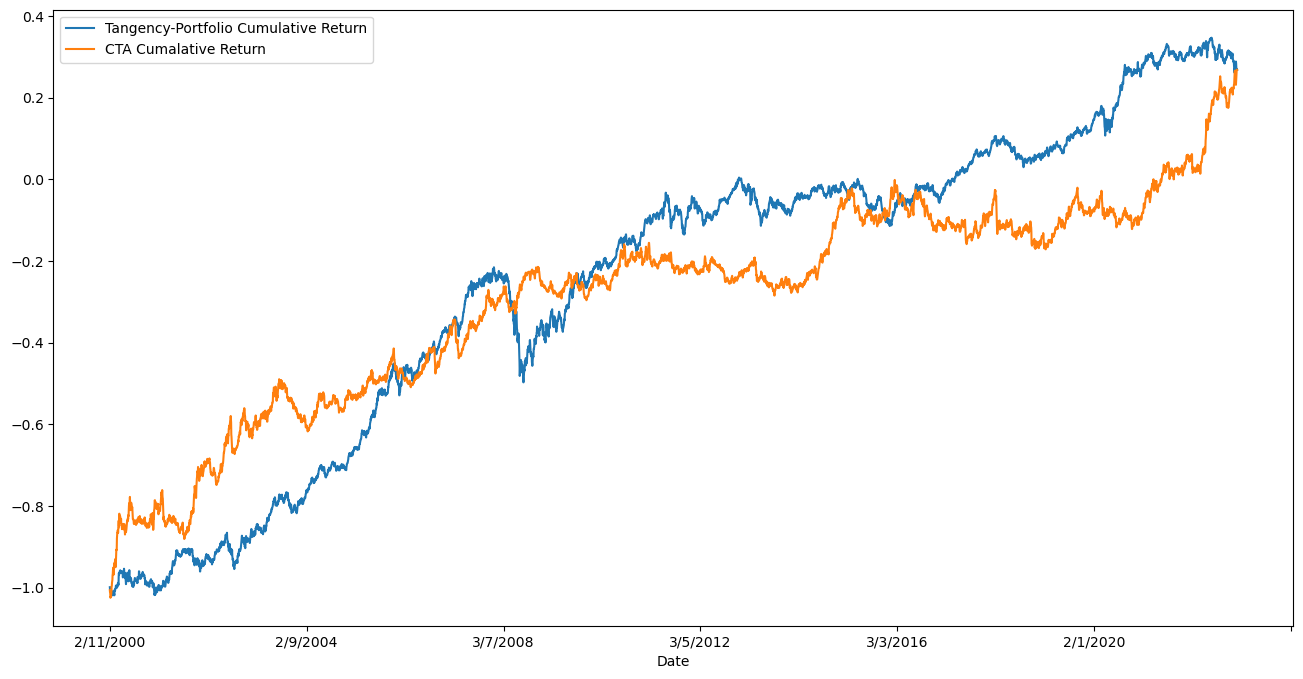

In [26]:
df_plot = pd.DataFrame({"Tangency-Portfolio Cumulative Return": AssetReturn["Cumulative Expected Return"],
                            "CTA Cumalative Return": cta.cumsum()-1},
                           index = cta.index)
    
    #np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 #figsize = (16, 8)
                                #)
df_plot.plot(figsize = (16, 8), label = ["Tangency-Portfolio Cumulative Return", "CTA Cumalative Return"])
plt.show()